# 用Seaborn做数据可视化

In [28]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

# 创建一些数据
rng = np.random.RandomState()
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

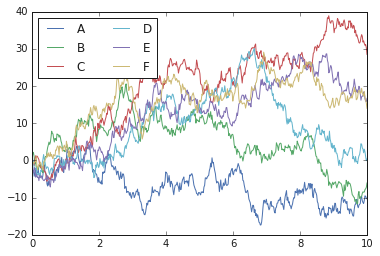

In [29]:
# 用Matplotlib默认样式画图
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\basemap2.jpg")

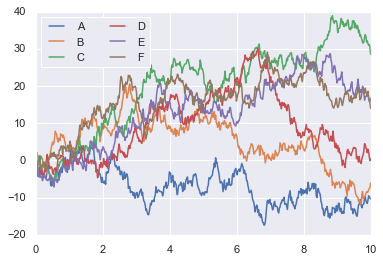

In [30]:
# Seaborn的默认样式图形
import seaborn as sns
sns.set()

# 同样的画图代码！
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\basemap3.jpg")

## 频次直方图、KDE和密度图

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


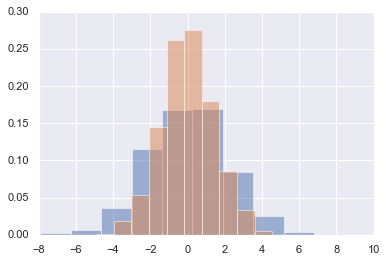

In [31]:
# 频次直方图
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\multivariate_normal.jpg")

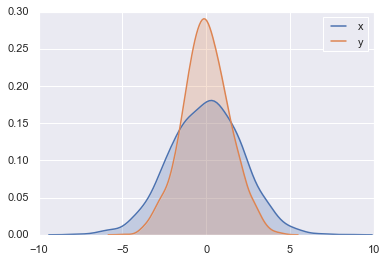

In [32]:
# KDE可视化分布特性
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

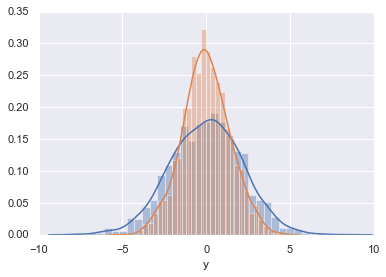

In [33]:
# 频次直方图与KDE的结合
sns.distplot(data['x'])
sns.distplot(data['y'])
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\KDE.jpg")

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


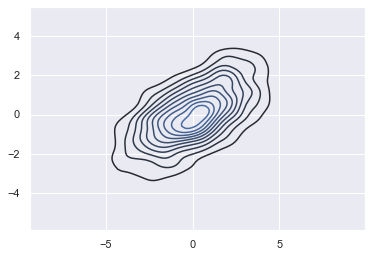

In [34]:
# 二维KDE图
sns.kdeplot(data)
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\二维KDE.jpg")

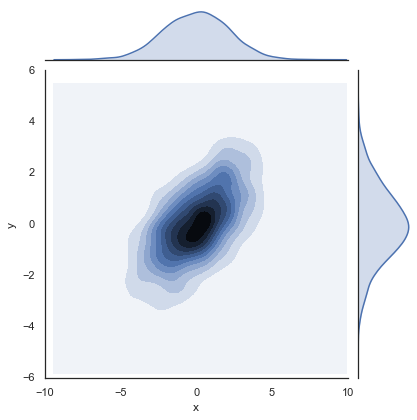

In [35]:
# 二维KDE的联合分布图
with sns.axes_style('white'):
    sns.jointplot(r"x", "y", data, kind='kde')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\KDE2.jpg")

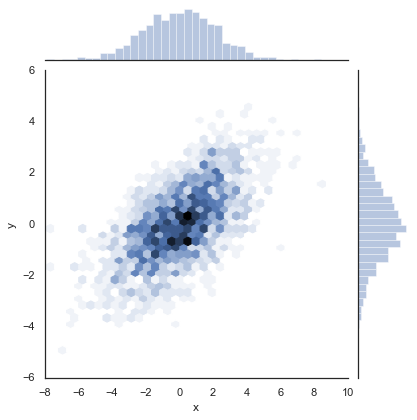

In [36]:
# 用六边形块画的联合分布图
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\六边形块画的联合分布图.jpg")

## 矩阵图
当我们需要对多维数据集进行可视化时，最终都要使用矩阵图。如果想画出所有变量中任意两个变量之间的图形，用矩阵图探索多维数据不同维度间的
相关性非常有效。下面将用著名的鸢尾花数据集来演示，其中有三种鸢尾花的花瓣与花萼数据。示例代码如下：

In [37]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


将可视化样本多个维度的关系呈现出来非常简单，直接用sns.pairplot即可，示例代码如下：

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


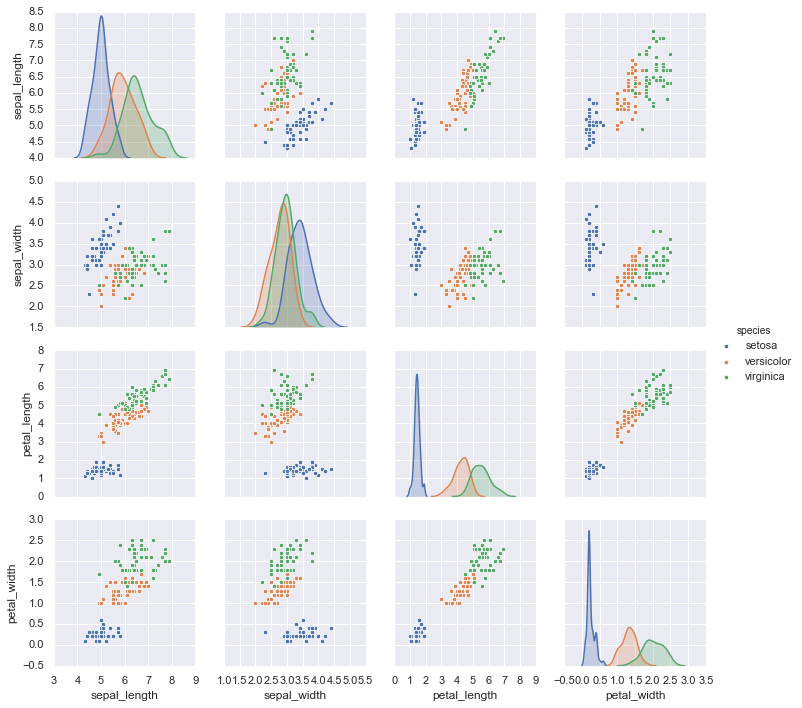

In [38]:
sns.pairplot(iris, hue='species', size=2.5)
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\pair plot.jpg")

## 分面频次直方图
有时观察数据最好的方法就是借助数据子集的频次直方图。Seaborn的FacetGrid函数让这件事变得非常简单。具体来看看某餐厅统计的服务员收取消费的
情况，示例代码如下：

In [39]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 分面频次直方图
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib\images\facetgrid.jpg")

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


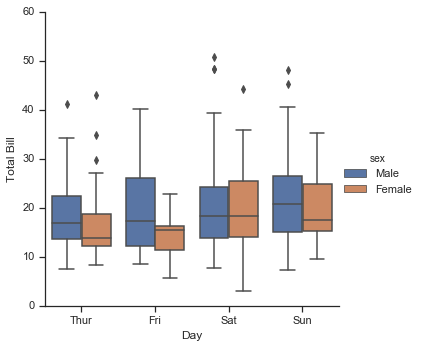

In [40]:
# 因子图中不同离散因子的分布对比
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\facetor_plot.jpg")

## 联合分布
可以用sns.jointplot画出不同数据集的联合分布和各数据本身的分布，示例代码如下：

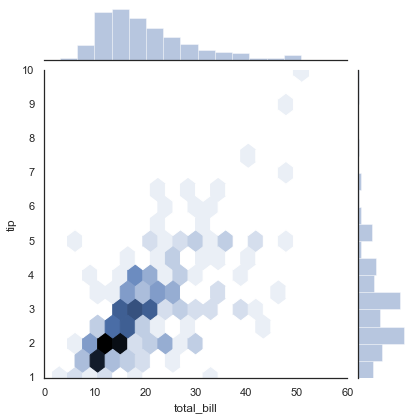

In [41]:
# 联合分布图
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind="hex")
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\facetor.jpg")

联合分布图可以自动进行KDE和回归，示例代码 如下：

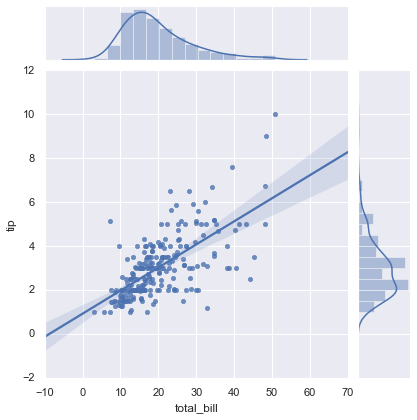

In [42]:
# 带回归拟合的联合分布
sns.jointplot("total_bill", "tip", data=tips, kind='reg')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\facetor2.jpg")

## 条形图
时间序列数据可以用sns.facetorplot画出条形图。示例代码如下：

In [43]:
planets = sns.load_dataset('planets')
planets.head()


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [46]:
# with sns.axes_style('white'):
#     g = sns.facetorplot("year", data=planets, aspect=2, 
#                         kind='count', color='steelblue')
#     g.set_xticklabels(step=5)
    
# with sns.axes_style('white'):
#     g = sns.facetorplot("year", data=planets, aspect=4.0, kind= 'count',  
#                         hue='method', order=range(2001, 2015))
#     g.set_ylabels('Number of Planets Discovered')


with sns.axes_style('white'):
    g = sns.facetorplot("year", data=planets, aspect=2, 
                        kind = "count", color = 'steelblue')
    
    g.set_xticklabels(step=5)
    
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\images\plants.jpg")

AttributeError: module 'seaborn' has no attribute 'facetorplot'